In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import math
import os

# Results

In [2]:
main_root = os.getcwd()

In [3]:
root = main_root + '\\GeneSets\\String\\1StepKernel_20genes\\Results'

In [7]:
samples = len(os.listdir(root))

In [9]:
result_example = root + '\\model_gset_set_0\\all\\f1.tab'

with open(result_example, 'r') as result:
    antibiotics = []
    for line in result:
        antibiotics.append(line.split('\t')[0])

results = pd.DataFrame(index = antibiotics, columns = range(samples))

In [10]:
for i in range(samples):
    result_file = root + f'\\model_gset_set_{i}\\all\\f1.tab'
    with open(result_file, 'r') as result:
        for line in result:
            values = line.split('\t')
            results.loc[values[0]][i] = np.around(float(values[1]), decimals = 3)

In [11]:
random_results = results.drop(0 , axis=1)

In [12]:
random_results.T

,ALL,AMP,AUG,AXO,CHL,FIS,FOX,GEN,KAN,STR,TET,TIO
1,0.701,0.711,0.694,0.711,0.467,0.763,0.699,0.622,0.577,0.684,0.712,0.702
2,0.75,0.708,0.755,0.742,0.594,0.749,0.736,0.655,0.579,0.735,0.764,0.787
3,0.71,0.684,0.682,0.698,0.546,0.758,0.648,0.619,0.745,0.716,0.711,0.694
4,0.744,0.718,0.739,0.748,0.575,0.763,0.745,0.621,0.619,0.733,0.749,0.753
5,0.737,0.682,0.733,0.746,0.572,0.745,0.73,0.636,0.702,0.731,0.747,0.764
6,0.756,0.703,0.752,0.766,0.584,0.796,0.733,0.621,0.695,0.752,0.763,0.765
7,0.755,0.709,0.783,0.783,0.583,0.747,0.773,0.63,0.725,0.741,0.74,0.747
8,0.703,0.701,0.703,0.705,0.453,0.72,0.681,0.634,0.554,0.69,0.756,0.712
9,0.743,0.744,0.743,0.735,0.599,0.759,0.715,0.644,0.547,0.717,0.748,0.746
10,0.747,0.733,0.759,0.735,0.585,0.757,0.688,0.642,0.572,0.741,0.773,0.762


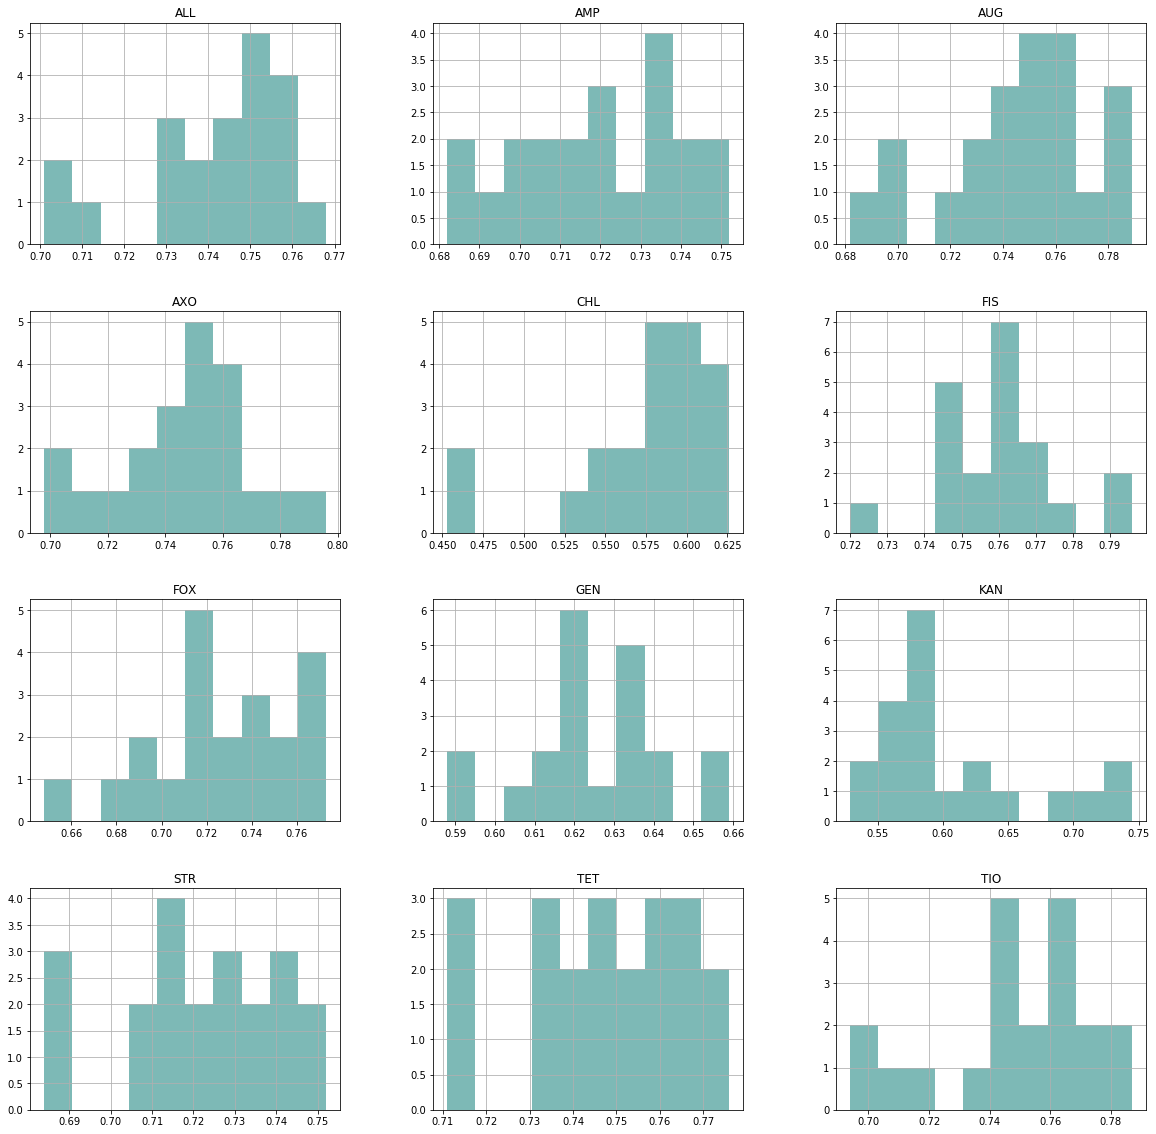

In [17]:
fig = random_results.astype(float).T.hist(figsize = (20, 20), color = '#7DB9B6')

In [14]:
df = pd.concat([results[0], results.mean(axis = 1), results.std(axis = 1)], axis = 1)
df.columns = ['F1 highest kernel', 'Mean F1 - random', 'Std F1 - random']

In [15]:
df

,F1 highest kernel,Mean F1 - random,Std F1 - random
ALL,0.756,0.741591,0.017773
AMP,0.74,0.720545,0.019954
AUG,0.776,0.747455,0.029081
AXO,0.769,0.748273,0.024125
CHL,0.606,0.575545,0.044755
FIS,0.733,0.759273,0.017130
FOX,0.757,0.729182,0.032095
GEN,0.626,0.625682,0.017311
KAN,0.604,0.607909,0.060064
STR,0.723,0.722227,0.018634


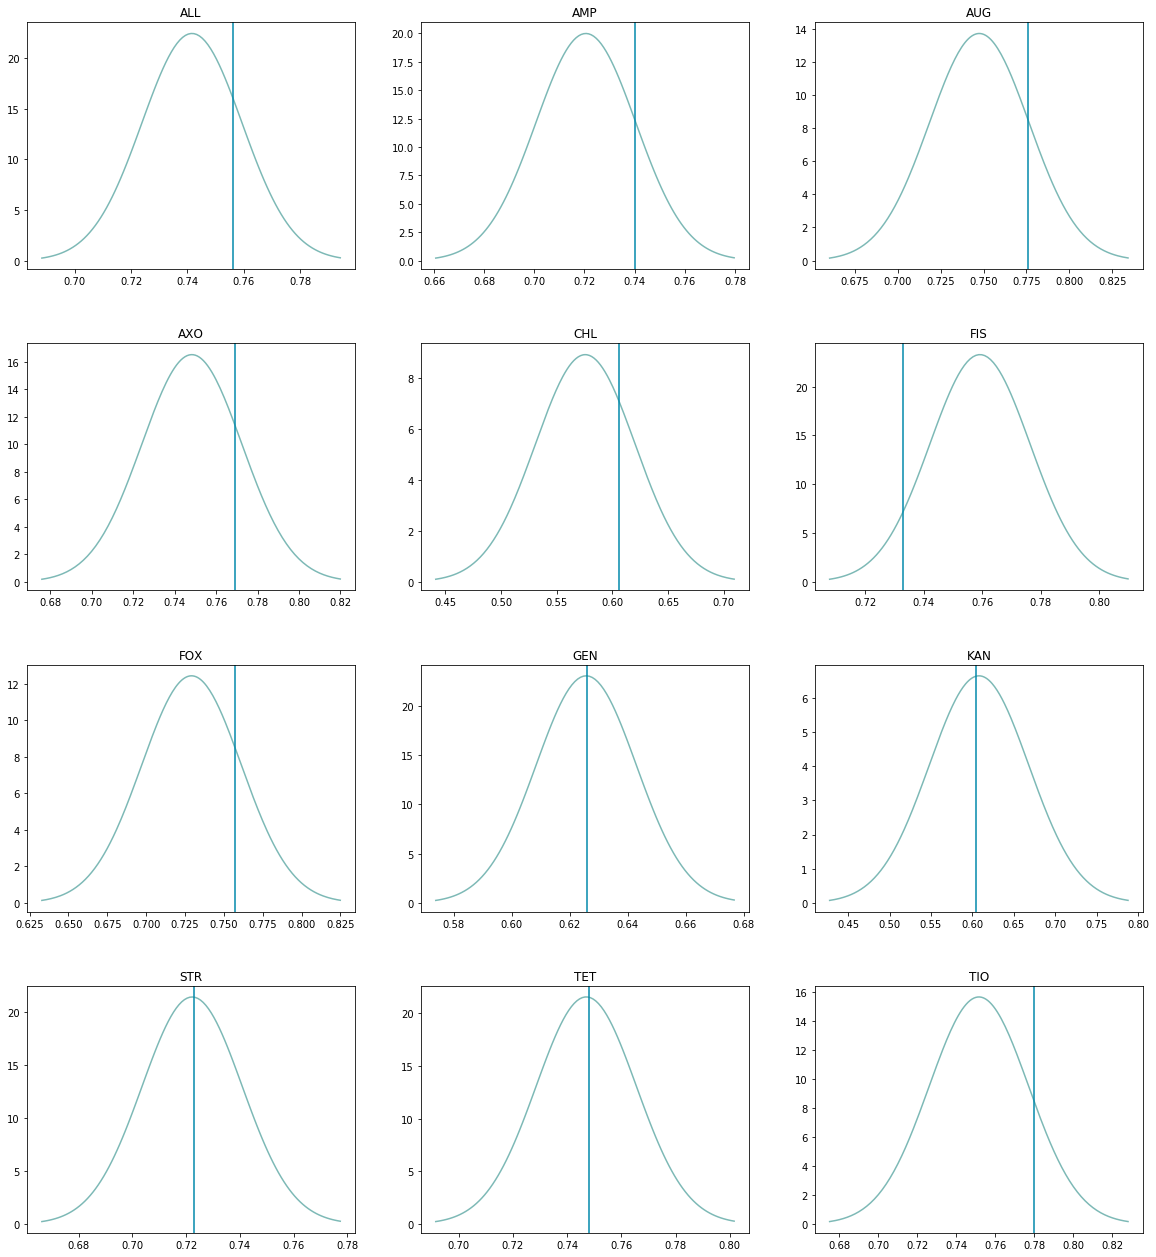

In [18]:
figure, axis = plt.subplots(nrows=4, ncols=3, figsize=(20, 17))


for row in range(4):
    for col in range(3):
        axis[row, col].set_title(antibiotics[3*row+col])
        line = 3*row+col
        value = df['F1 highest kernel'][line]
        m = df['Mean F1 - random'][line]
        s = df['Std F1 - random'][line]
        x_axis =(np.arange(m - 3*s, m + 3*s, 0.001))
        axis[row, col].plot(x_axis, norm.pdf(x_axis, m, s), color = '#7DB9B6')
        axis[row, col].axvline(x = value, color = '#0088aa', label = 'axvline - full height')
        axis[row, col].set_title(antibiotics[3*row+col])

        
plt.subplots_adjust(top = 0.999, bottom=0.01, hspace=0.3, wspace=0.2)